# Earthquakes and the wealth of nations
### Diaz - Panigua - Larroulet

We prepare the study data using a `Dataprep` object that describes all the details needed to define the synthetic control study. This works similarly to the `dataprep` method in the `R` package `synth`.

(For an explanation of each of the `Dataprep` arguments, see the package [documentation](https://sdfordham.github.io/pysyncon/dataprep.html#pysyncon.Dataprep)).

In [1]:
import sys
sys.path.insert(0, '../src')
import nz_util
from pysyncon import Dataprep, Synth
from pysyncon.utils import PlaceboTest

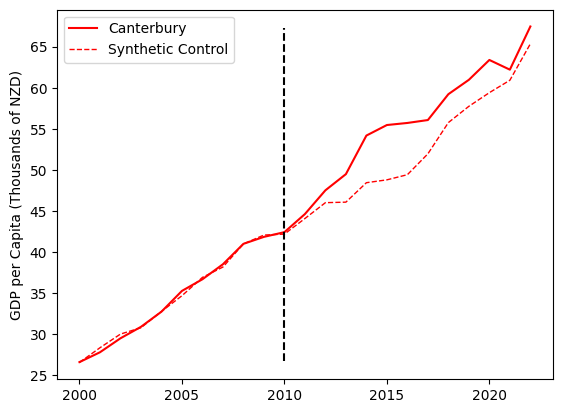

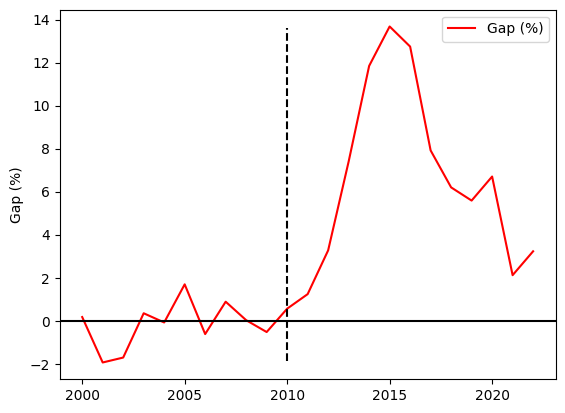

In [2]:
import importlib
import util
importlib.reload(util)

df = nz_util.clean_data_for_synthetic_control()
df['Tertiary Share'] = df['Tertiary'] / df['Population']
dataprep = Dataprep(
    foo=df,
    predictors=nz_util.SECTORIAL_GDP_VARIABLES,
    predictors_op="mean",
    time_predictors_prior=range(2005, 2009),
    special_predictors=[
        ("GDP per capita", range(2005, 2009), "mean"),
        ("Tertiary Share", range(2008, 2009), "mean")
    ],
    dependent="GDP per capita",
    unit_variable="Region",
    time_variable="Year",
    treatment_identifier="Canterbury",
    controls_identifier=[
    "Auckland",
    "Bay of Plenty",
    "Gisborne",
    "Hawke's Bay",
    "Manawatu-Whanganui",
    "Marlborough",
    "Northland",
    "Otago",
    "Southland",
    "Taranaki",
    "Tasman/Nelson",
    "Waikato",
    "Wellington",
    "West Coast"
],
    time_optimize_ssr=range(2000, 2009),
)

synth = Synth()
synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")
nz_res = util.synth_plot_nz(synth, time_period=range(2000, 2023), treatment_time=2010, filename='nz_gdp_paths.png')
util.gap_plot(synth, time_period=range(2000, 2023), treatment_time=2010, filename='nz_gap.png')

In [3]:
synth = Synth()
synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")
#nz_res = util.synth_plot_nz(synth, time_period=range(2000, 2023), treatment_time=2010)
synth.weights()

Auckland              0.327
Bay of Plenty         0.013
Gisborne              0.000
Hawke's Bay           0.237
Manawatu-Whanganui    0.130
Marlborough           0.000
Northland             0.000
Otago                 0.000
Southland             0.000
Taranaki              0.000
Tasman/Nelson         0.000
Waikato               0.000
Wellington            0.000
West Coast            0.294
Name: weights, dtype: float64

The `path_plot` method shows the path of the treated unit and the synthetic control over time.

In [4]:
synth.summary()[['treated', 'synthetic', 'sample mean']]

,treated,synthetic,sample mean
Agriculture,0.050,0.069,0.077
Administrative and Support Services,0.019,0.018,0.016
Construction,0.062,0.059,0.061
Education and Training,0.044,0.042,0.043
Financial and Insurance Services,0.036,0.036,0.029
Food and beverage services,0.015,0.016,0.014
Health Care and Social Assistance,0.062,0.054,0.057
"Information Media, Telecommunications and Other Services",0.065,0.054,0.049
Manufacturing,0.144,0.141,0.139
"Professional, Scientific, and Technical Services",0.060,0.053,0.049


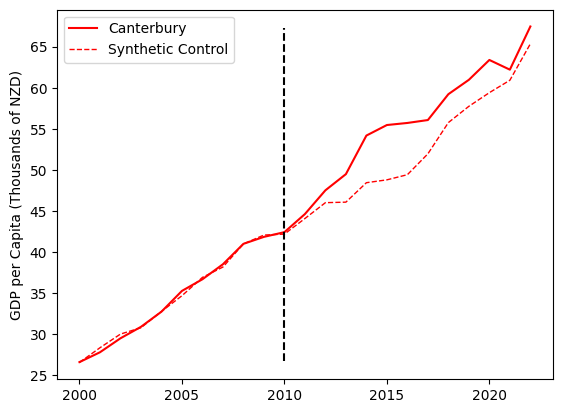

In [5]:
import util
import importlib
importlib.reload(util)

nz_res = util.synth_plot_nz(synth, time_period=range(2000, 2023), treatment_time=2010)

In [6]:
nz_res

,Synthetic Control,Canterbury
Year,,
2000,26558.359797,26604.0
2001,28349.083840,27799.0
2002,30013.737914,29500.0
2003,30788.194988,30895.0
2004,32765.511541,32739.0
2005,34681.440051,35268.0
2006,36914.936600,36686.0
2007,38174.497729,38512.0
2008,40987.750033,40998.0


In [7]:
synth.summary()

,V,treated,synthetic,sample mean
Agriculture,0.009,0.050,0.069,0.077
Administrative and Support Services,0.084,0.019,0.018,0.016
Construction,0.044,0.062,0.059,0.061
Education and Training,0.034,0.044,0.042,0.043
Financial and Insurance Services,0.113,0.036,0.036,0.029
Food and beverage services,0.033,0.015,0.016,0.014
Health Care and Social Assistance,0.007,0.062,0.054,0.057
"Information Media, Telecommunications and Other Services",0.000,0.065,0.054,0.049
Manufacturing,0.181,0.144,0.141,0.139
"Professional, Scientific, and Technical Services",0.026,0.060,0.053,0.049


We can run a Placebo test using the `PlaceboTest` class. After instantiating it, we supply the original `Dataprep` object to it as well as a synthetic control method object (our `synth` from previously) and any options that we want to supply to the synthetic control method object (the optimisation scheme and starting point for the optimisation scheme).

In [8]:
placebo_test = PlaceboTest()
placebo_test.fit(
    dataprep=dataprep,
    scm=synth,
    scm_options={"optim_method": "Nelder-Mead", "optim_initial": "equal"},
)

(1/14) Completed placebo test for Auckland.


(2/14) Completed placebo test for Taranaki.


(3/14) Completed placebo test for Wellington.
(4/14) Completed placebo test for Manawatu-Whanganui.


(5/14) Completed placebo test for Gisborne.


(6/14) Completed placebo test for Southland.


(7/14) Completed placebo test for Hawke's Bay.


(8/14) Completed placebo test for West Coast.
(9/14) Completed placebo test for Northland.
(10/14) Completed placebo test for Otago.


(11/14) Completed placebo test for Tasman/Nelson.
(12/14) Completed placebo test for Bay of Plenty.


(13/14) Completed placebo test for Waikato.


(14/14) Completed placebo test for Marlborough.


Calculating treated unit gaps.


Done.


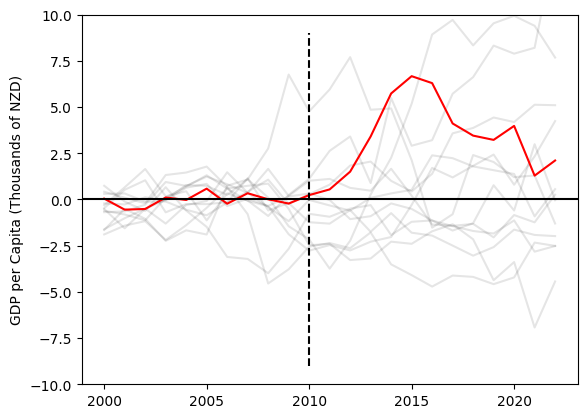

In [9]:
import util
importlib.reload(util)
util.placebo_plot(placebo_test, time_period=range(2000, 2023), mspe_threshold=100, treatment_time=2010,
    y_axis_label='GDP per Capita (Thousands of NZD)', filename='nz_placebos.png')

### Uniform Confidence Sets

Following Firpo & Possebom (2018), we construct uniform confidence bands for the treatment effect that are valid across all post-treatment periods. Unlike pointwise confidence intervals or pseudo p-values from placebo rankings, uniform confidence sets account for the multiple testing problem inherent in examining treatment effects over multiple time periods simultaneously.

The uniform approach uses the maximum absolute standardized gap across all post-treatment periods from the placebo distribution to construct confidence bands that maintain the desired coverage probability uniformly over time.

In [ ]:
import util
importlib.reload(util)

# Generate gap plot with uniform confidence bands (90% confidence)
util.gap_plot_with_uniform_ci(
    synth=synth,
    placebo=placebo_test,
    time_period=range(2000, 2024),
    treatment_time=2010,
    alpha=0.1,  # 90% confidence interval
    mspe_threshold=100,
    divide_by=1000,
    y_axis_label='GDP per Capita (Thousands of NZD)',
    filename='nz_gap_uniform_ci.png'
)

We calculate $p$-value of Abadie et al's version of Fisher's exact hypothesis test for no effect of treatment null using the `pvalue` method.

In [10]:
placebo_test.pvalue(treatment_time=2010)*100

0.0

#### Robustness test - Jacknife - Leave out highest weighted region (Auckland)

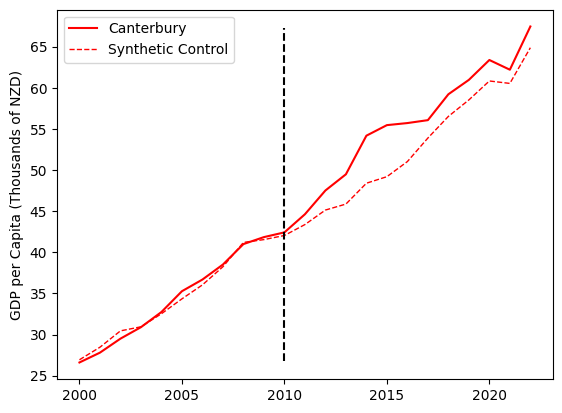

In [11]:
import importlib
import util
importlib.reload(util)

df = nz_util.clean_data_for_synthetic_control()
df['Tertiary Share'] = df['Tertiary'] / df['Population']
dataprep = Dataprep(
    foo=df,
    predictors=nz_util.SECTORIAL_GDP_VARIABLES,
    predictors_op="mean",
    time_predictors_prior=range(2005, 2009),
    special_predictors=[
        ("GDP per capita", range(2005, 2009), "mean"),
        ("Tertiary Share", range(2008, 2009), "mean")
    ],
    dependent="GDP per capita",
    unit_variable="Region",
    time_variable="Year",
    treatment_identifier="Canterbury",
    controls_identifier=[
    #"Auckland",
    "Bay of Plenty",
    "Gisborne",
    "Hawke's Bay",
    "Manawatu-Whanganui",
    "Marlborough",
    "Northland",
    "Otago",
    "Southland",
    "Taranaki",
    "Tasman/Nelson",
    "Waikato",
    "Wellington",
    "West Coast"
],
    time_optimize_ssr=range(2000, 2009),
)

synth_jacknife = Synth()
synth_jacknife.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")
nz_res = util.synth_plot_nz(synth_jacknife, time_period=range(2000, 2023), treatment_time=2010, filename='nz_jacknife.png')


### Sectorial SCM - Construction, Financial and Insurance Services, Agriculture, Manufacturing

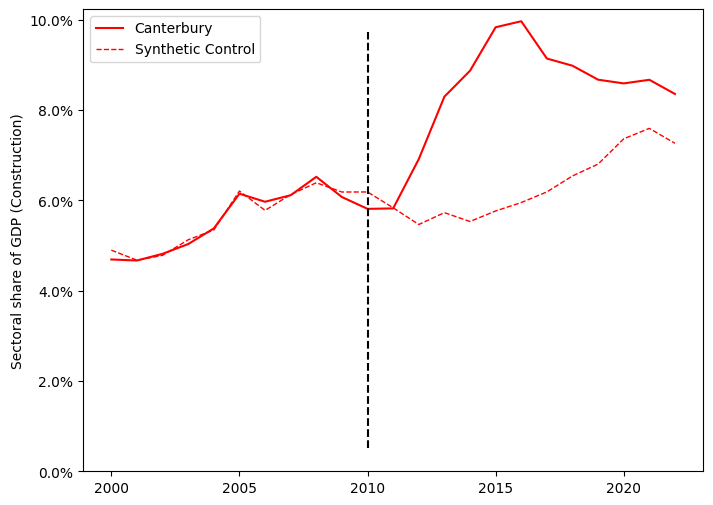

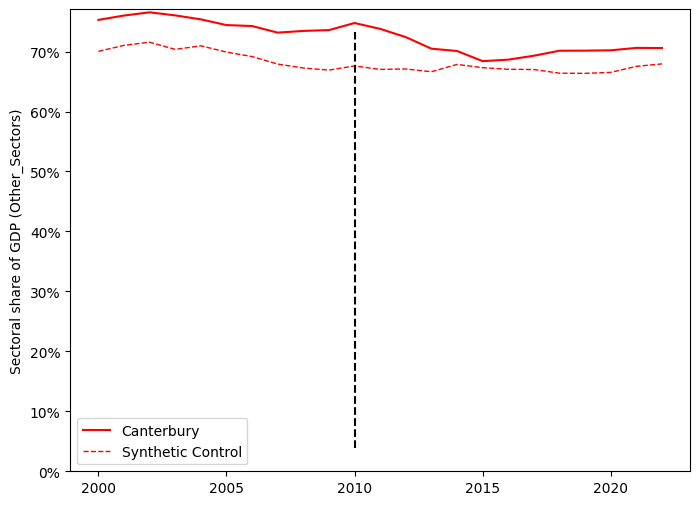

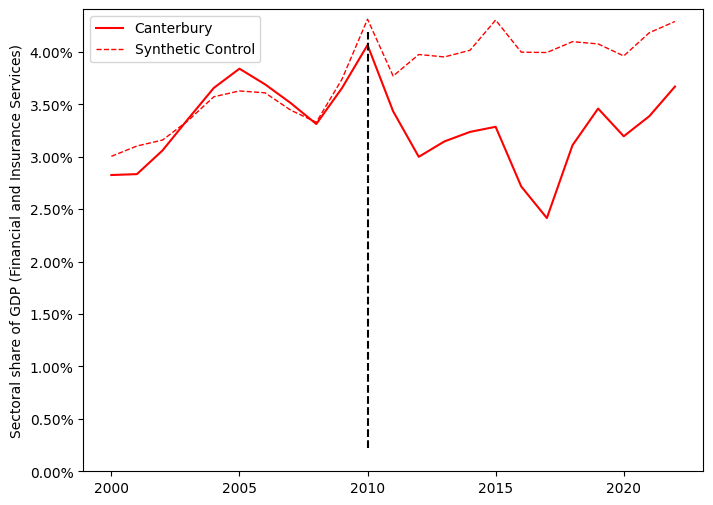

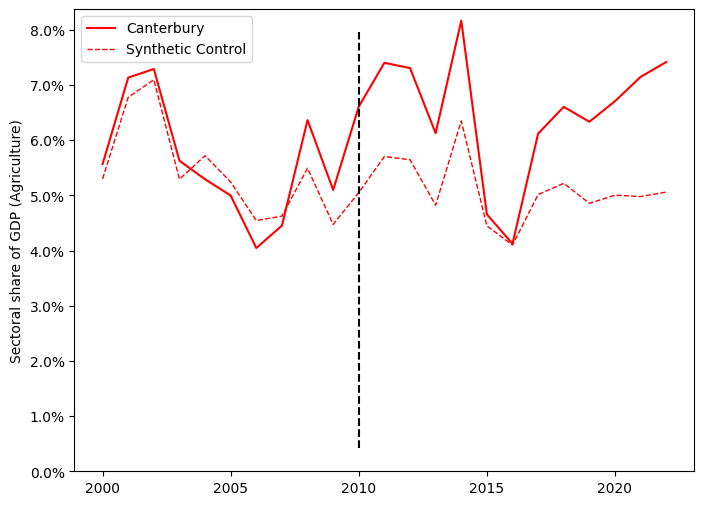

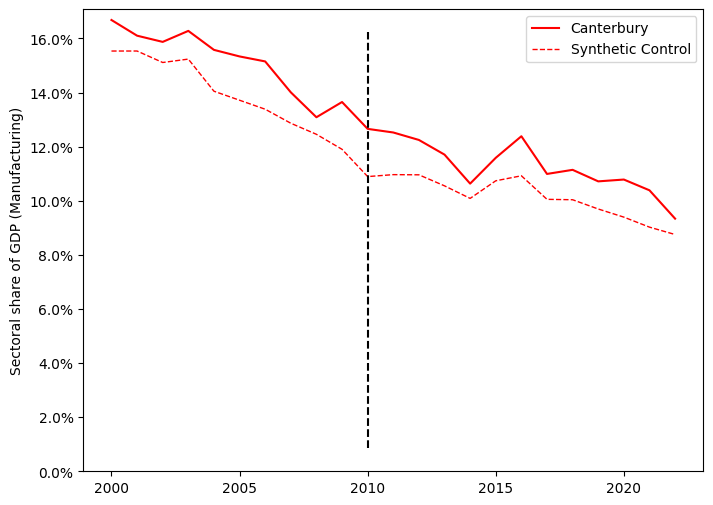

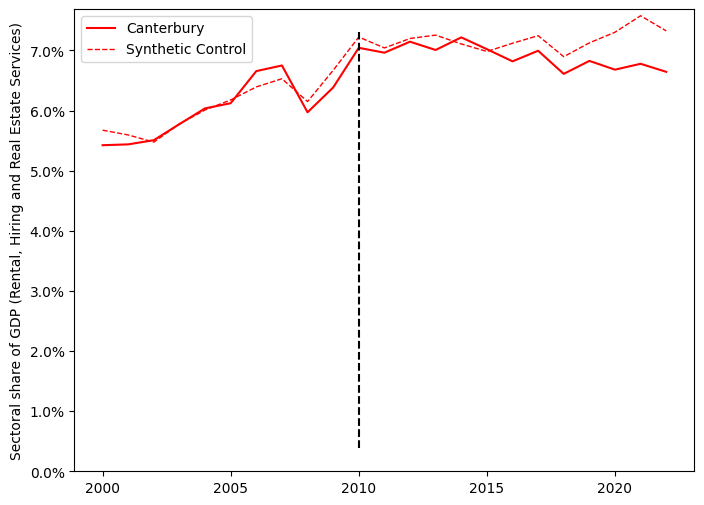

In [12]:
import importlib
import util
importlib.reload(util)

df = nz_util.clean_data_for_synthetic_control()
df['Tertiary Share'] = df['Tertiary'] / df['Population']

df['Other_Sectors'] = df[[v for v in nz_util.SECTORIAL_GDP_VARIABLES if v != 'Construction']].sum(axis=1)
sectors_to_analyze = ["Construction", "Other_Sectors", "Financial and Insurance Services", "Agriculture", "Manufacturing", "Rental, Hiring and Real Estate Services"]
res = {}
for variable in sectors_to_analyze:
    predictors_lst = ['Construction'] if variable == 'Other_Sectors' else [var for var in nz_util.SECTORIAL_GDP_VARIABLES if var != variable]
    dataprep = Dataprep(
        foo=df,
        predictors=predictors_lst,
        predictors_op="mean",
        time_predictors_prior=range(2005, 2009),
        special_predictors=[
            ("GDP per capita", range(2005, 2009), "mean"),
            ("Tertiary Share", range(2008, 2009), "mean")
        ],
        dependent=variable,
        unit_variable="Region",
        time_variable="Year",
        treatment_identifier="Canterbury",
        controls_identifier=[
            "Auckland",
            "Bay of Plenty",
            "Gisborne",
            "Hawke's Bay",
            "Manawatu-Whanganui",
            "Marlborough",
            "Northland",
            "Otago",
            "Southland",
            "Taranaki",
            "Tasman/Nelson",
            "Waikato",
            "Wellington",
            "West Coast"
        ],
        time_optimize_ssr=range(2000, 2009),
    )
    synth = Synth()
    synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")
    nz_res = util.synth_plot_sector(synth, time_period=range(2000, 2023), treatment_time=2010, filename=f'nz_scm_{variable}.png', sector=variable)
    res[variable] = nz_res.copy(deep=True)



In [13]:
# Create a Pandas Excel writer using XlsxWriter as the engine (saves to article_assets)
import os
import pandas as pd
import util
_excel_path = os.path.join(util.FIGURES_DIR, 'nz_sectorial.xlsx')
with pd.ExcelWriter(_excel_path, engine='xlsxwriter') as writer:
    for sheet_name, sheet_data in res.items():
        # Convert the dictionary data to a DataFrame
        df = pd.DataFrame(sheet_data)
        # Write the DataFrame to a specific sheet
        df.to_excel(writer, sheet_name=sheet_name.split()[0], index=True)